In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def extract_patches(img, patch_size, overlap):
    patches = []
    step = patch_size - overlap
    for y in range(0, img.shape[0] - patch_size + 1, step):
        for x in range(0, img.shape[1] - patch_size + 1, step):
            patches.append((x, y, img[y:y + patch_size, x:x + patch_size]))
    return patches

def average_overlaps(patches, img_shape, patch_size, overlap):
    reconstruction = np.zeros(img_shape, dtype=np.float64)
    count = np.zeros(img_shape, dtype=np.float64)

    step = patch_size - overlap
    for x, y, patch in patches:
        reconstruction[y:y + patch_size, x:x + patch_size] += patch
        count[y:y + patch_size, x:x + patch_size] += 1

    # Avoid division by zero
    count[count == 0] = 1
    reconstruction /= count
    return reconstruction.astype(np.uint8)



In [7]:
# Create a test image with different intensity blocks
test_img = np.zeros((90, 90), dtype=np.uint8)
test_img[0:40, 0:100] = 100  # Top-left
test_img[0:100, 100:210] = 150  # Top-right
test_img[100:210, 0:100] = 200  # Bottom-left
test_img[100:210, 100:210] = 250  # Bottom-right

# Parameters
patch_size = 50  # Example patch size
overlap = 10     # Overlap of 10 pixels

# Extract patches
patches = extract_patches(test_img, patch_size, overlap)

# Average overlapping patches
reconstructed_image = average_overlaps(patches, test_img.shape, patch_size, overlap)


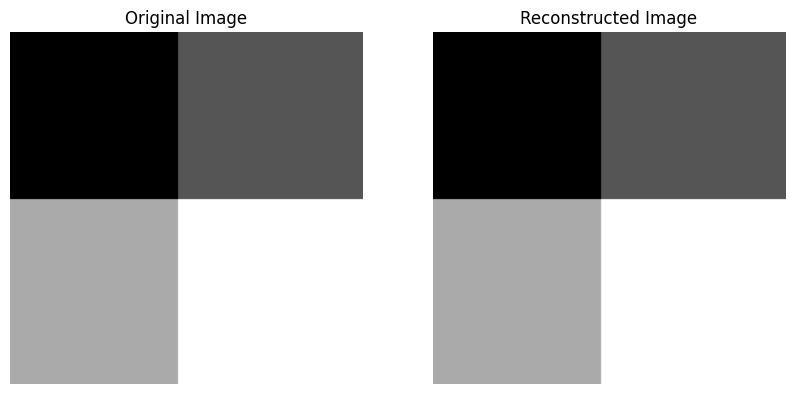

In [8]:

# Display the original and reconstructed images using matplotlib for better visualization

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(test_img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(reconstructed_image, cmap='gray')
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')

plt.show()

(-0.5, 89.5, 89.5, -0.5)

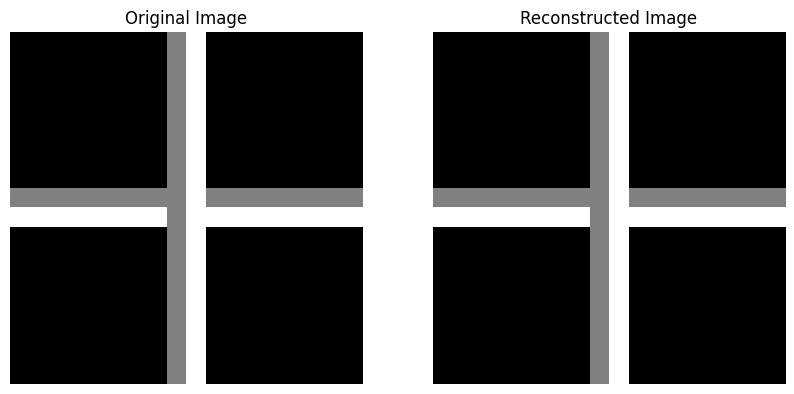

In [27]:
test_img = np.zeros((90, 90), dtype=np.uint8)
test_img[40:45,:]=50
test_img[45:50,:]=100
test_img[:,40:45]=50
test_img[:,45:50]=100
patches = extract_patches(test_img, patch_size, overlap)

# Average overlapping patches
reconstructed_image = average_overlaps(patches, test_img.shape, patch_size, overlap)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(test_img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(reconstructed_image, cmap='gray')
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')
